# <div align="center"> __Analyse Hilbertienne et Fourier :__ </div>
# <div align="center"> __TP2 - Fenêtres et vocoder__ </div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import wave

## **Exercice 1 – Analyse d’un signal périodique par morceaux.**

### **1) Fabriquer un signal contenant la fréquence F1 = 440Hz pendant 2s et F2 = 600Hz pendant 3s avec une fréquence d’échantillonnage F e = 2400Hz.**

In [4]:
F1 = 440
Tf1 = 2

F2 = 600
Tf2 = 3

Fe = 2400

absc_sin1 = np.linspace(0, Tf1, Tf1*Fe)
absc_sin2 = np.linspace(0, Tf2, Tf2*Fe)

sin1 = np.sin(2*np.pi*F1*absc_sin1)
sin2 = np.sin(2*np.pi*F2*absc_sin2)

sintot = np.concatenate((sin1, sin2))
absc_sintot = np.linspace(0, Tf1 + Tf2, Fe*(Tf1 + Tf2))

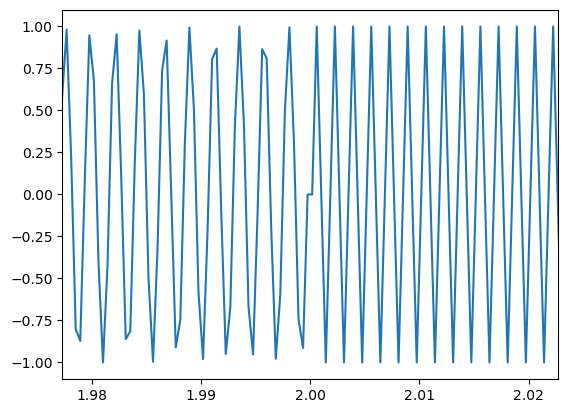

In [5]:
plt.plot(absc_sintot, sintot)
plt.xlim(Tf1 - 10/F1, Tf1 + 10/F1)
plt.show()

### **2) Déterminer la taille minimale de la fenêtre temporelle permettant de capturer les deux fréquences présentes dans le signal.**

Le fenêtre minimale est la suivante :

In [6]:
taille_fenetre = 1/F1 + 1/F2
print("Taille de la fenêtre minimale : ", taille_fenetre)
Fe*taille_fenetre

Taille de la fenêtre minimale :  0.00393939393939394


9.454545454545455

### **3) Représenter le spectrogramme pour différentes tailles de fenêtres et étudier la dépendance vis à vis de la résolution temporelle et de la résolution fréquencielle.**

Test pour différentes tailles de fenêtres :

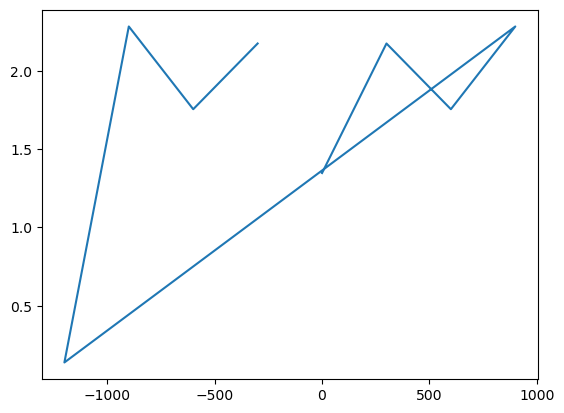

Taille de la demi-fenêtre : 4 (2^2)


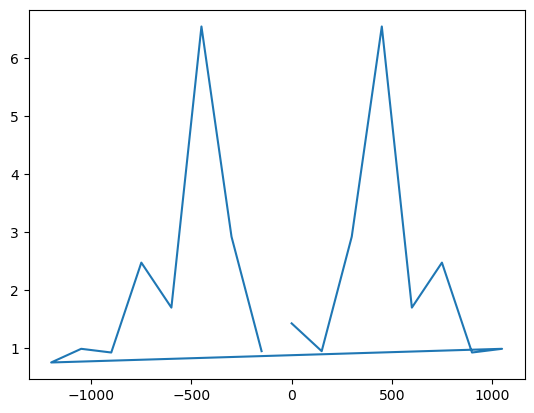

Taille de la demi-fenêtre : 8 (2^3)


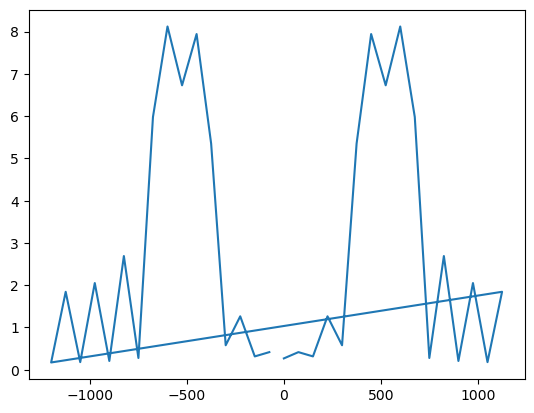

Taille de la demi-fenêtre : 16 (2^4)


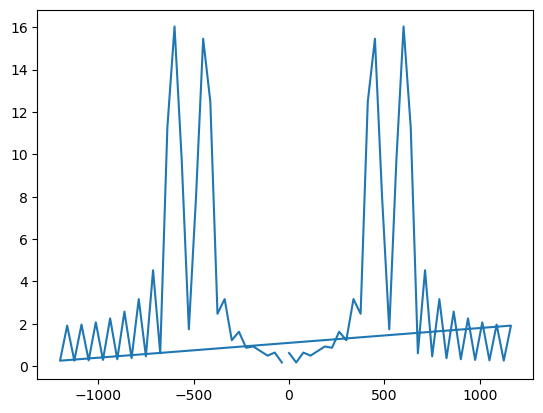

Taille de la demi-fenêtre : 32 (2^5)


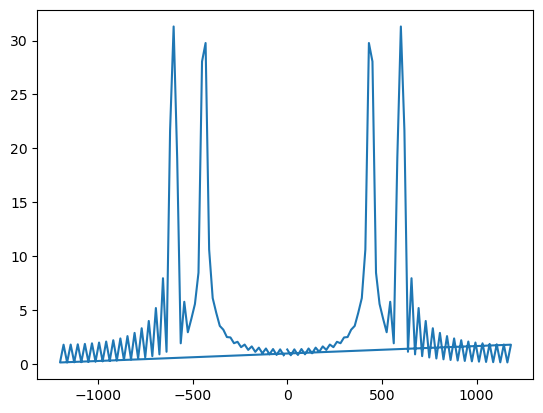

Taille de la demi-fenêtre : 64 (2^6)


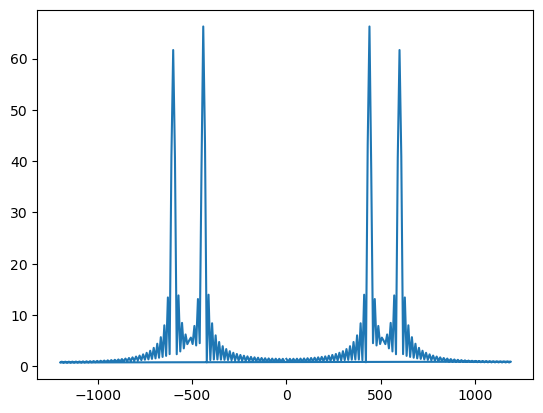

Taille de la demi-fenêtre : 128 (2^7)


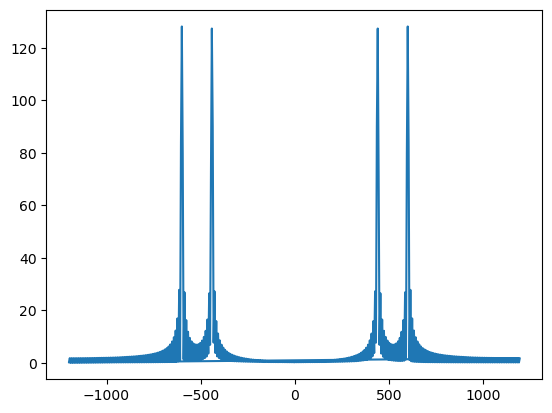

Taille de la demi-fenêtre : 256 (2^8)


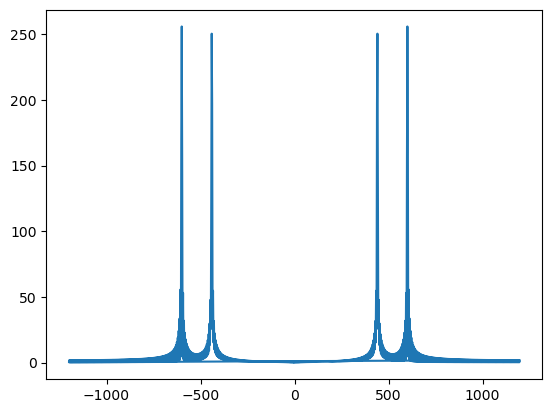

Taille de la demi-fenêtre : 512 (2^9)


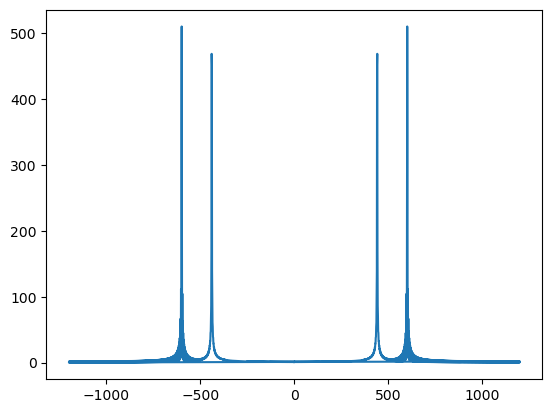

Taille de la demi-fenêtre : 1024 (2^10)


In [7]:
tailles_demi_fenetres = [2**i for i in range(2, 11)]

i = 2
for taille_demi_fenetre in tailles_demi_fenetres:
    echantillon = np.concatenate((sintot[-taille_demi_fenetre:], sintot[:taille_demi_fenetre]))
    fft_echantillon = np.fft.fft(echantillon)
    freqs = np.fft.fftfreq(len(echantillon), 1/Fe)
    plt.plot(freqs, np.abs(fft_echantillon))
    plt.show()
    print("Taille de la demi-fenêtre : " + str(taille_demi_fenetre) + " (2^" + str(i) + ")")
    i += 1

On obtient des résultats satisfaisants à partir d'une taille de fenêtre de $2^8$.

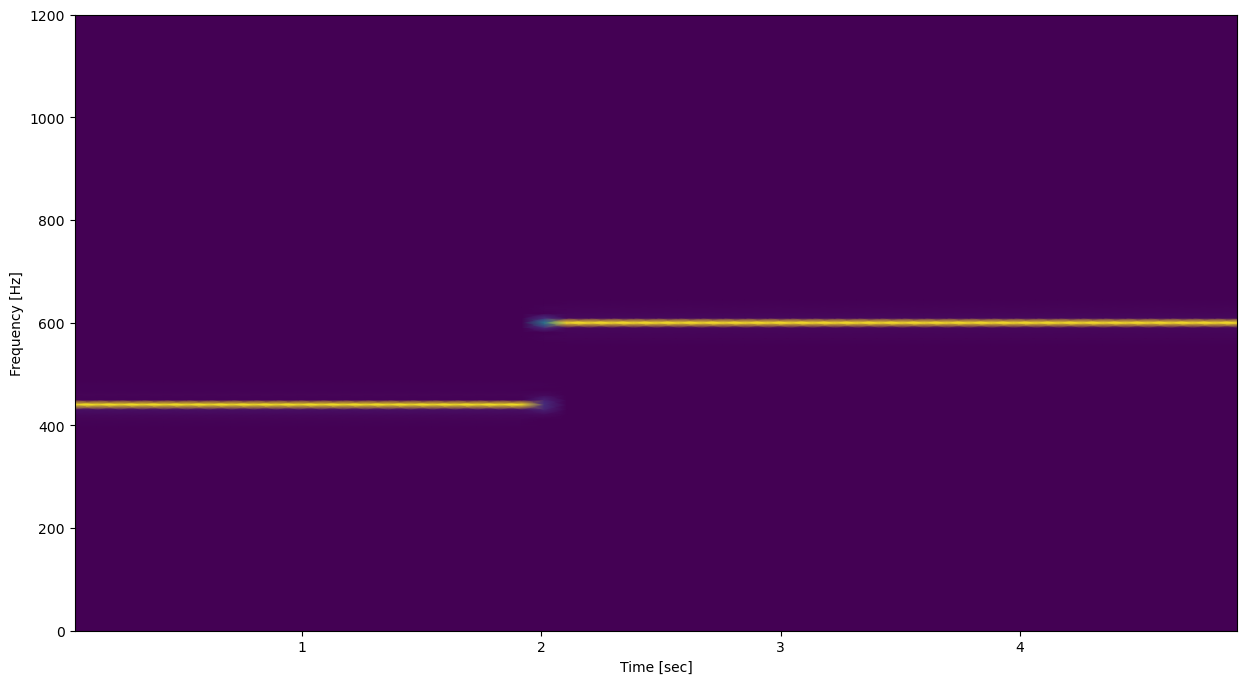

In [13]:
from scipy import signal

f, t, Sxx = signal.spectrogram(sintot, Fe)
plt.figure(figsize=(15,8))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

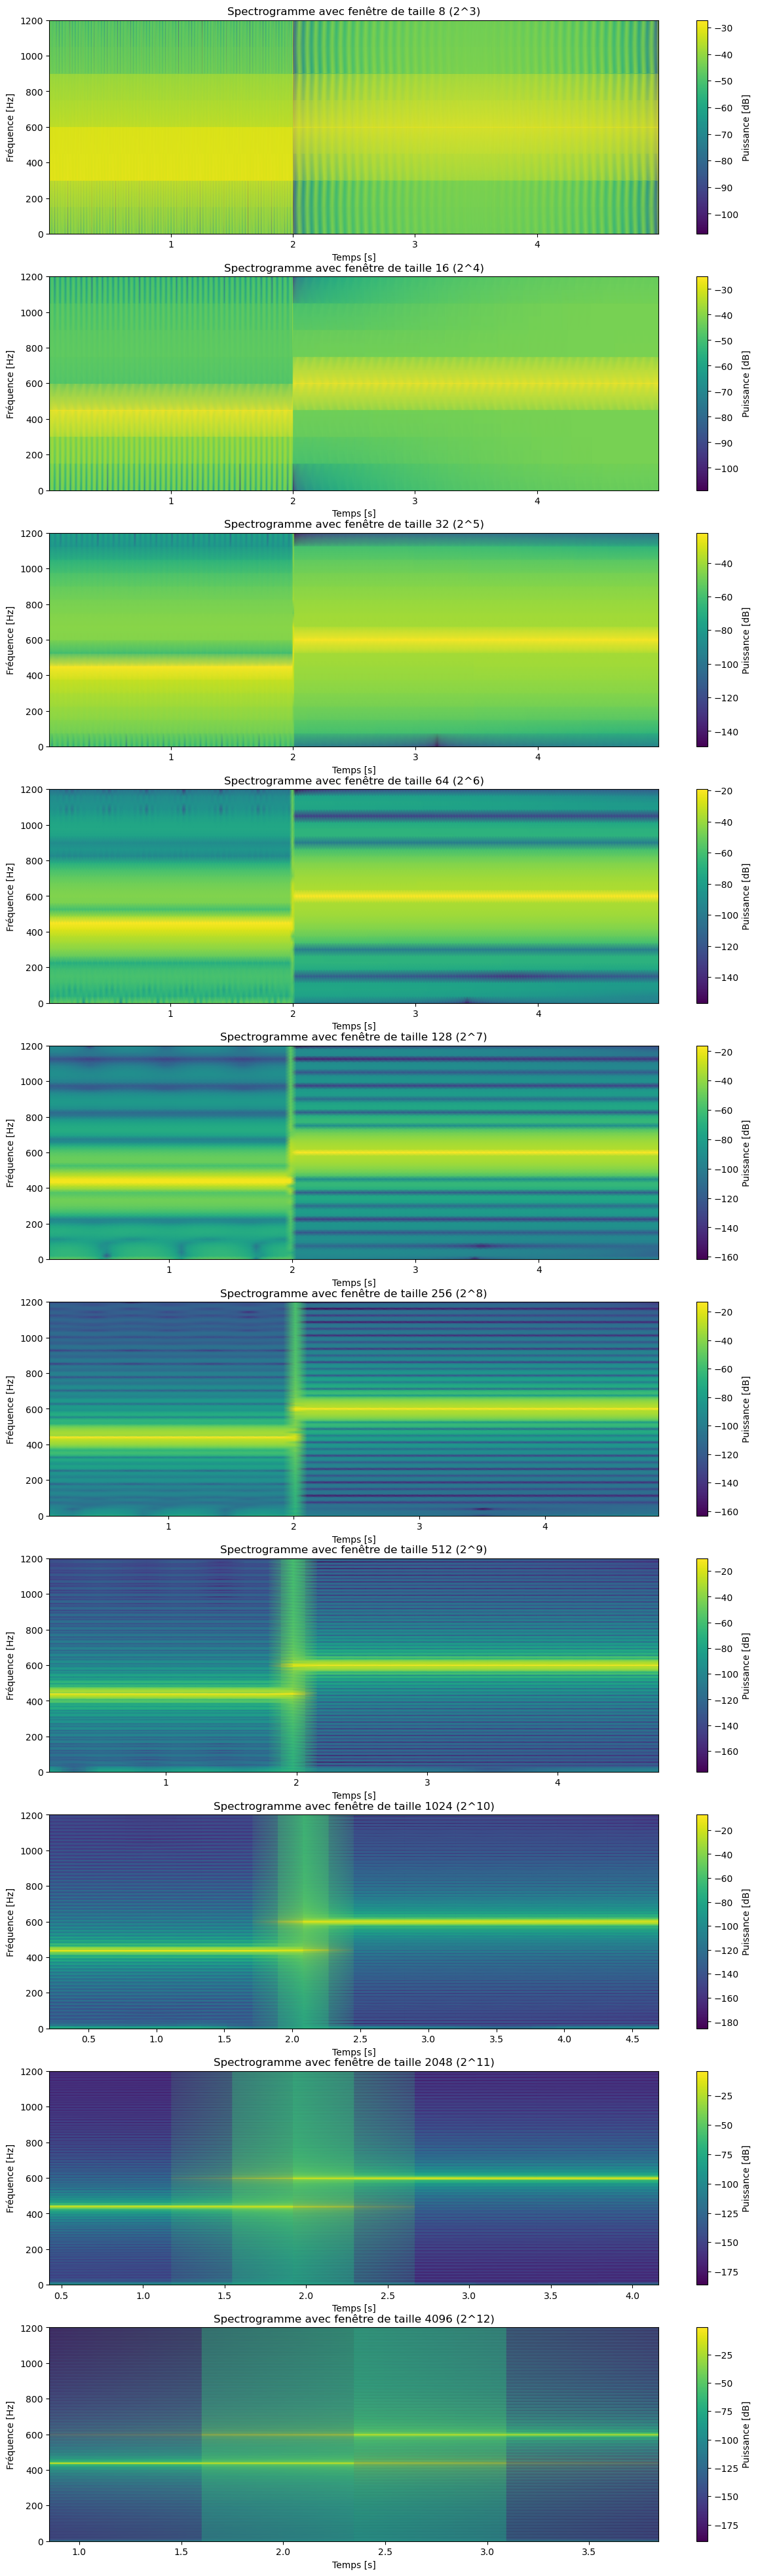

In [24]:
tailles_demi_fenetres = [2**i for i in range(2, 12)]

plt.figure(figsize=(15, 50)) 

for i, taille_demi_fenetre in enumerate(tailles_demi_fenetres):
    #echantillon = np.concatenate((sintot[-taille_demi_fenetre:], sintot[:taille_demi_fenetre]))
    f, t, Sxx = signal.spectrogram(sintot, Fe, nperseg=2*taille_demi_fenetre)

    #f, t, Sxx = signal.spectrogram(sintot, Fe)

    plt.subplot(len(tailles_demi_fenetres), 1, i+1)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')

    plt.title('Spectrogramme avec fenêtre de taille {}'.format(2*taille_demi_fenetre) + " (2^" + str(i + 3) + ")")
    plt.ylabel('Fréquence [Hz]')
    plt.xlabel('Temps [s]')
    plt.colorbar(label='Puissance [dB]')

    #fft_echantillon = np.fft.fft(echantillon)
    #freqs = np.fft.fftfreq(len(echantillon), 1/Fe)
    #plt.plot(freqs, np.abs(fft_echantillon))
    #plt.show()
    #print("Taille de la demi-fenêtre : " + str(taille_demi_fenetre) + " (2^" + str(i + 2) + ")")

plt.show()

### **4) A partir du spectrogramme, extraire les lignes de crètes (les endroits où les coefficients de Fourier sont de plus grande amplitude).**

In [8]:
# TODO

## **Exercice 2 – Fréquences instantanées.**

https://docs.scipy.org/doc/scipy/reference/signal.html

### **1) Chirps linéaires Faire l’analyse temps fréquence d’un signal de la forme $x(t) = \alpha ~ cos(at + bt^2)$.**

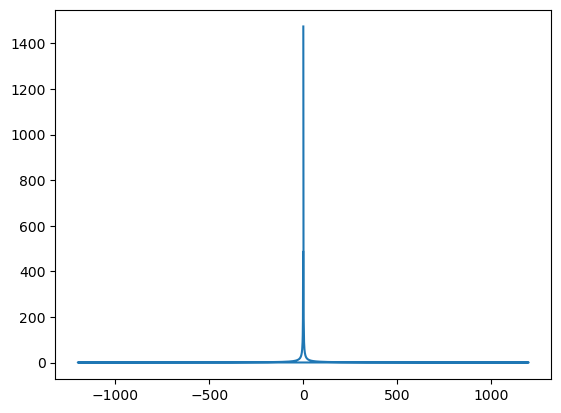

In [30]:
abscisses_chirp_lin = np.linspace(0, 1, Fe*1)
alpha1 = 1
a1 = 1
b1 = 1
chirp_lin1 = alpha1 * np.sin(a1*abscisses_chirp_lin + b1*abscisses_chirp_lin**2)

fft_chirp_lin1 = np.fft.fft(chirp_lin)
freqs = np.fft.fftfreq(len(chirp_lin), 1/Fe)
plt.plot(freqs, np.abs(fft_chirp_lin))
plt.show()

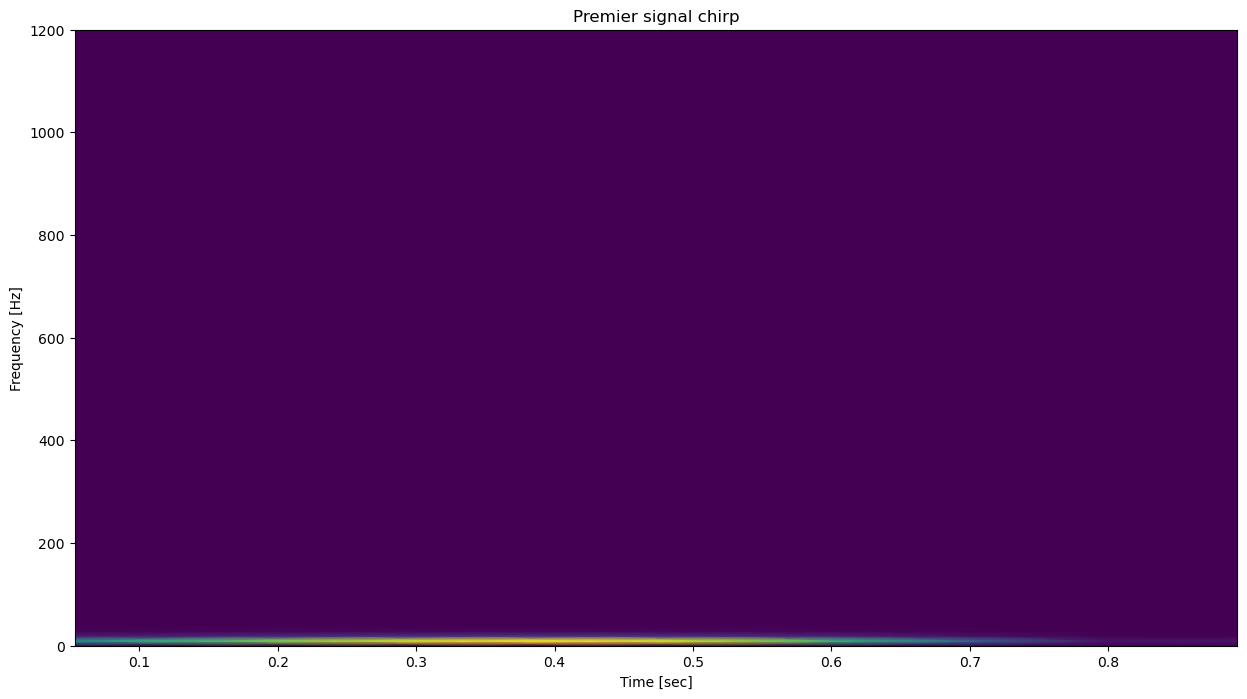

In [59]:
f1, t1, Sxx1 = signal.spectrogram(chirp_lin1, Fe)
plt.figure(figsize=(15,8))
plt.pcolormesh(t1, f1, Sxx1, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Premier signal chirp")
plt.show()

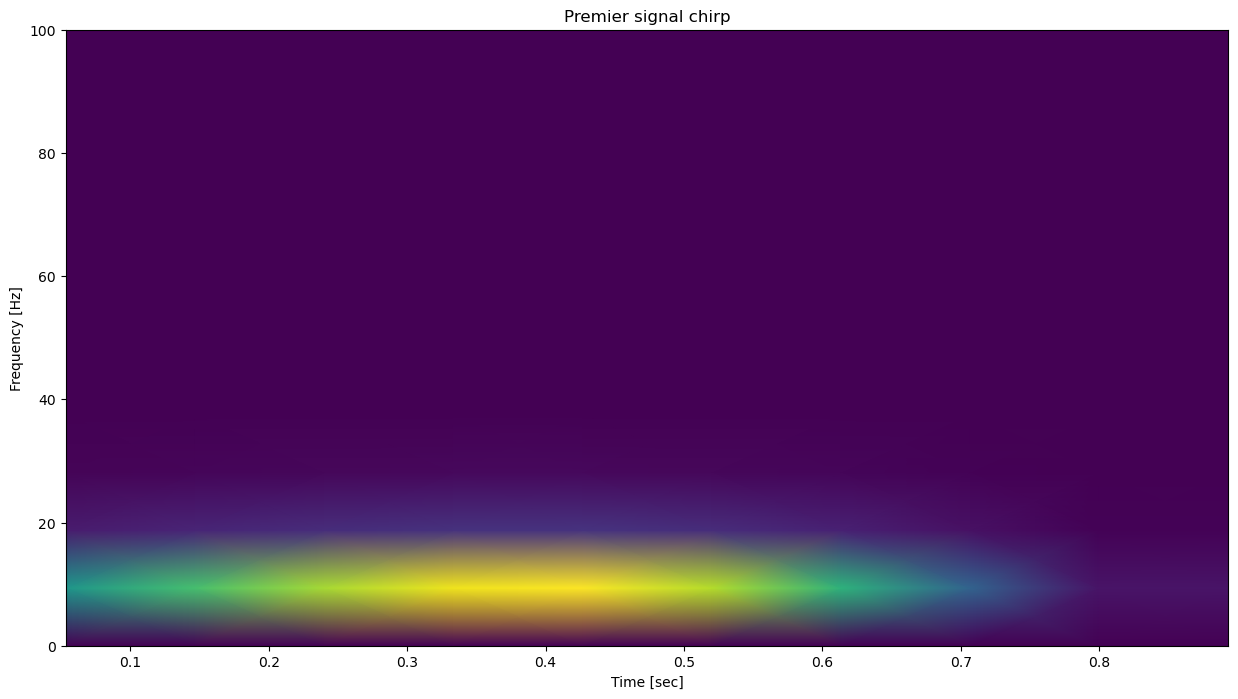

In [60]:
plt.figure(figsize=(15,8))
plt.pcolormesh(t1, f1, Sxx1, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Premier signal chirp")
plt.ylim(0, 100)
plt.show()

### **2) Faire l’analyse temps-fréquence de la somme de deux chirps linéaires.**

In [53]:
alpha2 = 1
a2 = 0.5
b2 = 0.5
chirp_lin2 = alpha2 * np.sin(a2*abscisses_chirp_lin + b2*abscisses_chirp_lin**2)

chirp_lintot = chirp_lin1 + chirp_lin2

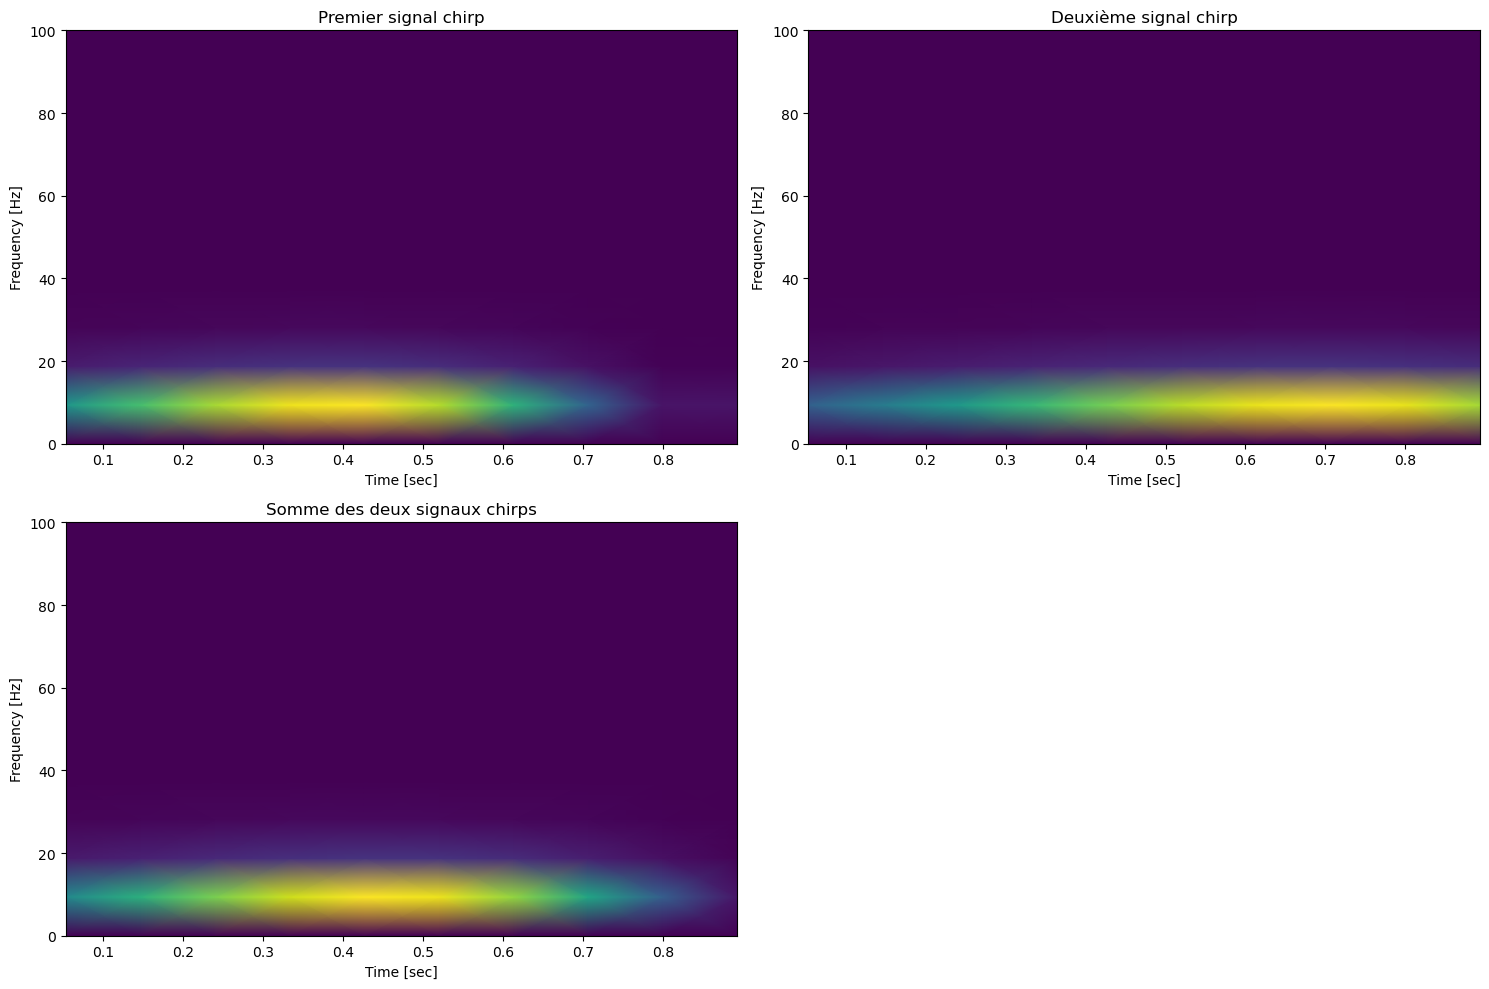

In [82]:
f2, t2, Sxx2 = signal.spectrogram(chirp_lin2, Fe)

f, t, Sxx = signal.spectrogram(chirp_lintot, Fe)


plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.pcolormesh(t1, f1, Sxx1, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Premier signal chirp")
plt.ylim(0, 100)

plt.subplot(2,2,2)
plt.pcolormesh(t2, f2, Sxx2, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Deuxième signal chirp")
plt.ylim(0, 100)


plt.subplot(2,2,3)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Somme des deux signaux chirps")
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

### **3) Chirps hyperboliques : Faire l’analyse temps fréquence d’un signal de la forme $x(t) = \alpha ~ cos\displaystyle\left(\cfrac{a}{b - t}\right)$ pour $t < b$. Expliquer ce qui se passe lorsqu’on approche de $t = b$.**

In [93]:
alpha3 = 1
a3 = 1
b3 = 1

abscisses_chirp_hyp = np.linspace(0, b3, Fe*b3, endpoint=False)

In [94]:
chirp_hyp1 = alpha3 * np.cos(a3/(b3 - abscisses_chirp_hyp))

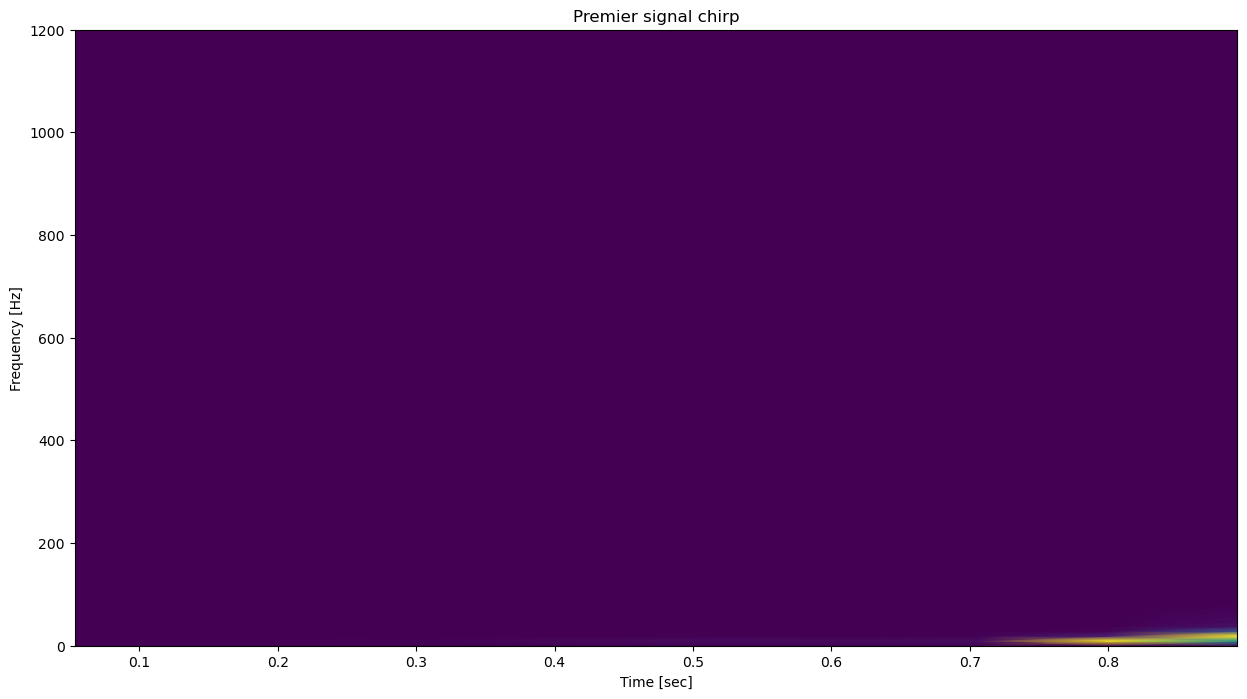

In [101]:
f3, t3, Sxx3 = signal.spectrogram(chirp_hyp1, Fe)
plt.figure(figsize=(15,8))
plt.pcolormesh(t3, f3, Sxx3, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Premier signal chirp")
plt.show()

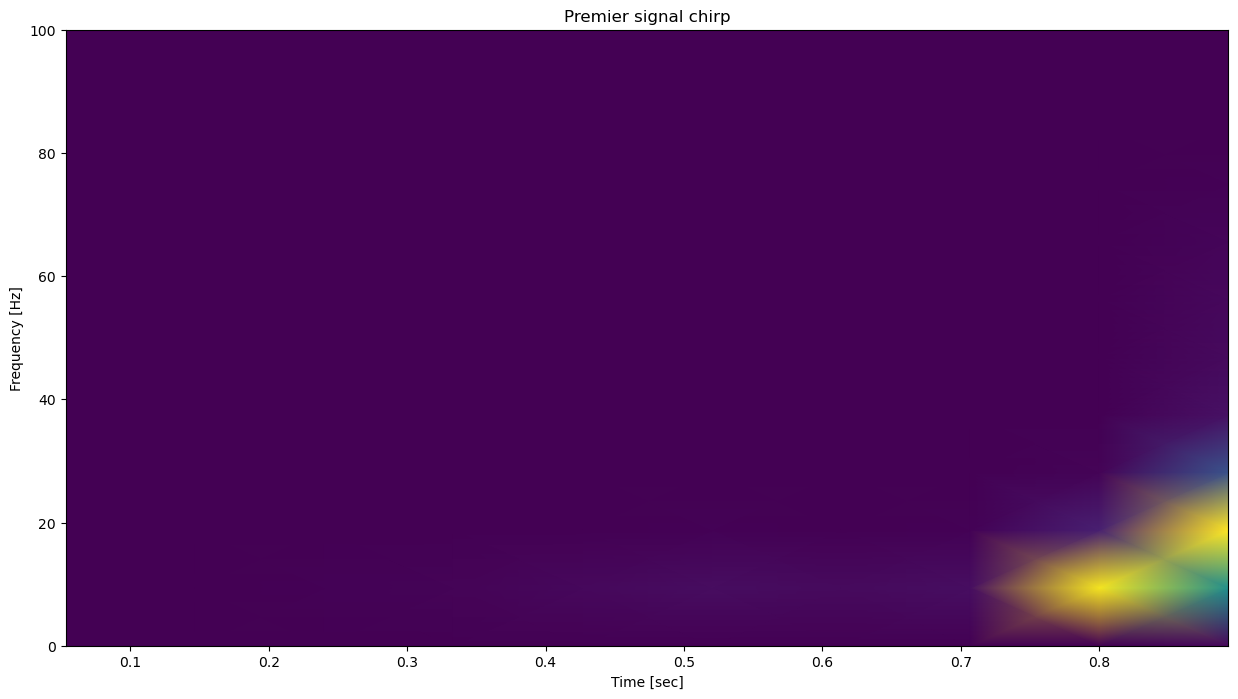

In [100]:
f3, t3, Sxx3 = signal.spectrogram(chirp_hyp1, Fe)
plt.figure(figsize=(15,8))
plt.pcolormesh(t3, f3, Sxx3, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Premier signal chirp")
plt.ylim(0,100)
plt.show()

Pour $t$ proche de 0, on remarque que "l'énergie" n'est pas forte. En revanche, à l'approcge de $b$, la "pulsation instantanée" augmente fortement, d'où la croissance de l'énergie à l'approche de la borne $b$.

In [96]:
alpha4 = 1
a4 = 2
b4 = b3

In [97]:
chirp_hyp2 = alpha4 * np.cos(a4/(b4 - abscisses_chirp_hyp))

chirp_hyptot = chirp_hyp1 + chirp_hyp2

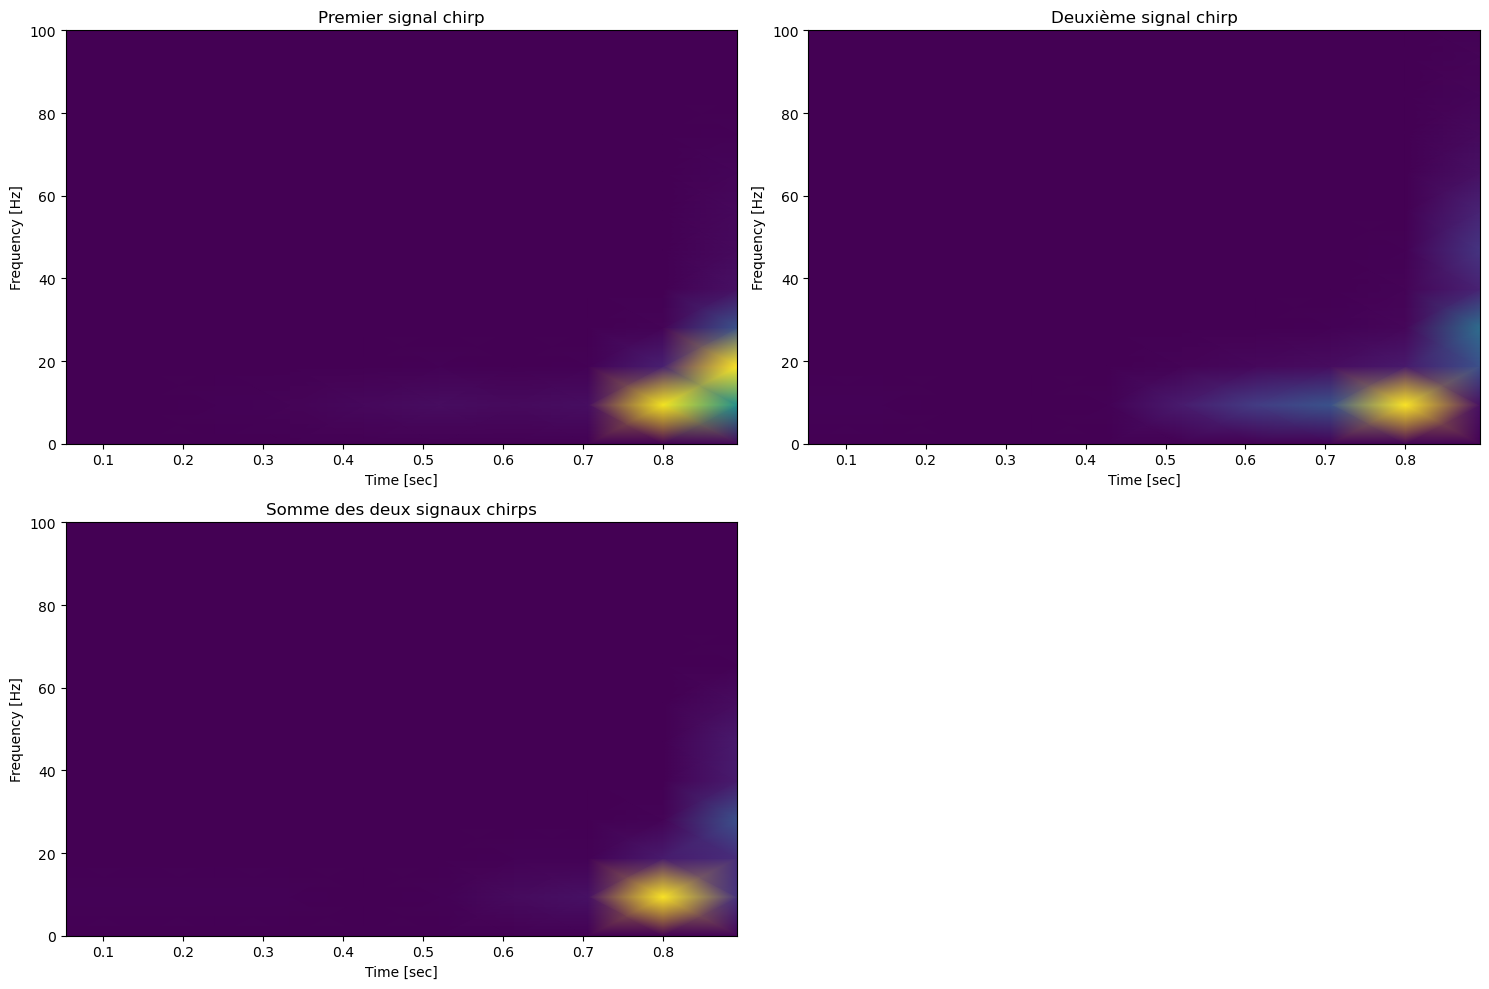

In [98]:
f4, t4, Sxx4 = signal.spectrogram(chirp_hyp2, Fe)

f, t, Sxx = signal.spectrogram(chirp_hyptot, Fe)


plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.pcolormesh(t3, f3, Sxx3, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Premier signal chirp")
plt.ylim(0, 100)

plt.subplot(2,2,2)
plt.pcolormesh(t4, f4, Sxx4, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Deuxième signal chirp")
plt.ylim(0, 100)


plt.subplot(2,2,3)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Somme des deux signaux chirps")
plt.ylim(0, 100)

plt.tight_layout()
plt.show()